# MoonIndex - M3 total indexes

Spectral indexes for the Moon Mineralogical Mapper (M3). This notebook directly creates all the indexes.

Author:Javier Eduardo Suarez Valencia

Contact: jsuarezvalencia@constructor.university

In [1]:
#Importing libraries
import rioxarray as riox
import numpy as np
import MoonIndex.preparation
import MoonIndex.plotting
import MoonIndex.filtration
import MoonIndex.indexes

# Importing data and preparation

In [2]:
#Defining the paths
path_data='/home/jovyan/work/Index/data' #Path to the data
path_results='/home/jovyan/work/Index/results'#Path to the results
target='M3_Apollo' #Name of the used cube

This M3 cube is already proccesed to level 2, hence its values are in reflectance and it is map projected (see USGS ISIS3). The file with the wavelengths is neccesary, it is provided in the Github repository.

In [ ]:
#Import data: raster and wavelengths
input_cube=riox.open_rasterio(f'{path_data}/{target}.tif') 
wavelengths_full=np.loadtxt(f'{path_data}/Wavelength.txt', delimiter=",")  #This file contains the wavelegnths values of M3, it is neccesary to have it
wavelengths_full=(wavelengths_full).astype(np.float32)

In [5]:
#This function attach the wavelength to the cube, sets the no value data to 0 and deletes the two first malfunctioning bands, and the bands after 2700 nm
M3_input_cube=MoonIndex.preparation.attach_wave(input_cube,wavelengths_full)

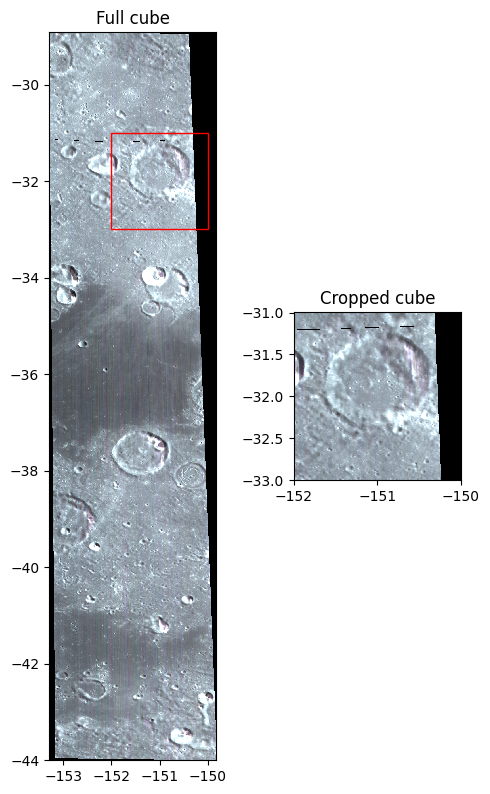

In [6]:
#Cropping the cube
M3_cube=MoonIndex.preparation.crop_cube(M3_input_cube,-152,-33,
                                        -150,-31) #Inputs are the cube and the coordinates to crop, minx, miny, maxx, maxy
#Cropping the data with indexes
#M3_cube=MoonIndex.preparation.crop_cube_size(M3_input_cube,25,630,2700,2800)  #Inputs are the cubes and the coordinates of the cropping rectangle (x limits and y limits)

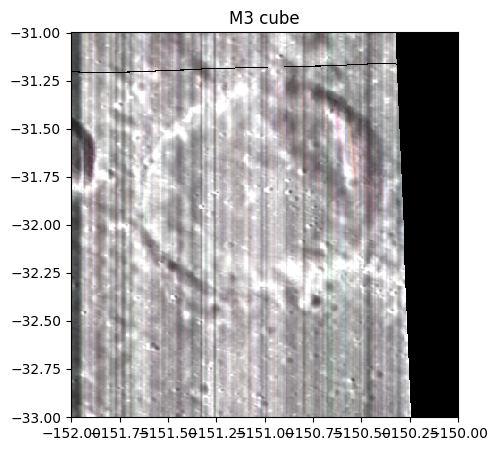

In [7]:
#Viewing the data, arguments are the cube and the size
#M3_cube.rio.to_raster(f'{path_results}/{target}_Clip.tif') Uncomment if you want to export an image of the cropped cube
#We select thre random bands to visualize a RGB composite
MoonIndex.plotting.cube_plot(M3_cube[0:3,:,:],5,'M3 cube')

In [8]:
#Defining the shape of the cube, x=bands, y=vertical, z=horizontal
x,y,z=M3_cube.shape
x,y,z

(83, 434, 434)

# Obtaining all the indexes with one function

The next functions output the final cubes with all the indexes for the two continuum-removal methods. In other notebooks, the procces is described in detail and each product is created step by step.

In [ ]:
#Obtaining all the indexes in a single cube by the convex hull method
M3_full_CH=MoonIndex.indexes.indexes_total_CH(M3_cube,wavelengths_full)
M3_full_CH.rio.to_raster(f'{path_results}/{target}_indexes_CH.tif')

In [ ]:
#Obtaining all the indexes in a single cube by the convex linear-fit method
M3_full_LF=MoonIndex.indexes.indexes_total_LF(M3_cube,wavelengths_full,2,1)
M3_full_LF.rio.to_raster(f'{path_results}/{target}_indexes_LF.tif')

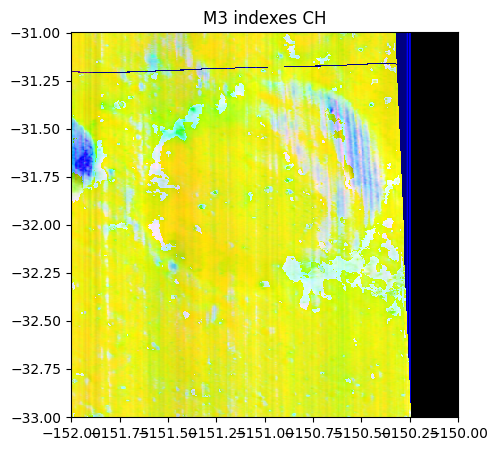

In [15]:
#Plotting some random indexes to check, you can see the documentation to see possible combination
M3_full_CHa=M3_full_CH.to_array() #Tranforms the dataset to a dataarray to plot
MoonIndex.plotting.cube_plot(M3_full_CHa[3:6,:,:],5,
                             'M3 indexes CH')

# References

Bretzfelder, J. M., Klima, R. L., Greenhagen, B. T., Buczkowski, D. L., Petro, N. E., & Day, M. (2020). Identification of Potential Mantle Rocks Around the Lunar Imbrium Basin. Geophysical Research Letters, 47(22). https://doi.org/10.1029/2020GL090334

Clenet, H. (2009). Télédétection hyperspectrale: Minéralogie et pétrologie, Application au volcan Syrtis Major (Mars) et à l’ophiolite d’Oman. Université de Toulouse.

Corley, L. M., McGovern, P. J., Kramer, G. Y., Lemelin, M., Trang, D., Gillis-Davis, J. J., Taylor, G. J., Powell, K. E., Kiefer, W. S., Wieczorek, M., & Zuber, M. T. (2018). Olivine-bearing lithologies on the Moon: Constraints on origins and transport mechanisms from M3 spectroscopy, radiative transfer modeling, and GRAIL crustal thickness. Icarus, 300, 287-304. https://doi.org/10.1016/j.icarus.2017.09.012

Horgan, B. H. N., Cloutis, E. A., Mann, P., & Bell, J. F. (2014). Near-infrared spectra of ferrous mineral mixtures and methods for their identification in planetary surface spectra. Icarus, 234, 132-154. https://doi.org/10.1016/j.icarus.2014.02.031

Shkuratov, Yu., Surkov, Ye., Ivanov, M., Korokhin, V., Kaydash, V., Videen, G., Pieters, C., & Stankevich, D. (2019). Improved Chandrayaan-1 M3 data: A northwest portion of the Aristarchus Plateau and contiguous maria. Icarus, 321, 34-49. https://doi.org/10.1016/j.icarus.2018.11.002

Zambon, F., Carli, C., Altieri, F., Luzzi, E., Combe, J.-P., Ferrari, S., Tognon, G., & Massironi, M. (2020). Spectral Index and RGB maps—Beethoven, Rembrandt basins on Mercury, Apollo basin and Leibnitz and Von Karman craters regions on the Moon (p. 57).
